# Assignment 03
Hyperparameter Tunning - Group 07


## 6 Data Preparation (7 Points)

In [1]:
# Add data preparation code here
import numpy as np
import pandas as pd

### **6.1** Load the dataset and display the dataframe (2 Points).

In [28]:
# Add code here
g07_df = pd.read_csv("/content/drive/MyDrive/online_shoppers_intention.csv")
g07_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [29]:
g07_df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### 6.2 Use describe to provide statistics on the pandas Dataframe (2 Points).

In [30]:
# Add code here
g07_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [33]:
# Convert weekend column to numerical values (0 for False, 1 for True)
g07_df['Weekend'] = g07_df['Weekend'].astype(int)
# Convert month column to numerical
g07_df['Month'] = g07_df['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [37]:
# encode the Visitor Type column
from sklearn.preprocessing import LabelEncoder
g07_df['VisitorType'] = LabelEncoder().fit_transform(g07_df['VisitorType'])

In [41]:
g07_df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,False


In [52]:
#g07_df.to_csv("a3_cleaned_data.csv", index=False)

### 6.3 Split the dataset into a Training set and a Test set. Justify your preferred split (3 Points).

In [42]:
# Add code here
from sklearn.model_selection import train_test_split

random_seed = 6135 # last 4 digits of guid
X = g07_df.iloc[:, 0:-1]
y = g07_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

## 7 Classification Routine (12 Points):
Execute a classification routine using RandomForestClassifier(), BaggingClassifier(), and XGboostclassifier(). Independently output the accuracy box plot as discussed in class. Use any package you are comfortable with (seaborn, matplotlib).

In [13]:
# Add code here
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [12]:
def base_models():
  models = dict()
  models['rf'] = RandomForestClassifier()
  models["bagging"] = BaggingClassifier()
  models["xgb"] = XGBClassifier()
  return models

In [14]:
def eval_models(models, X_train, y_train):
    results = {}
    for model_name, model in models.items():
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        results[model_name] = scores
    return results

In [15]:
def perform_classification_routine(X_train, y_train):
    # Grab models
    models = base_models()

    # Evaluate
    results = eval_models(models, X_train, y_train)

    return results

In [43]:
results = perform_classification_routine(X_train, y_train)

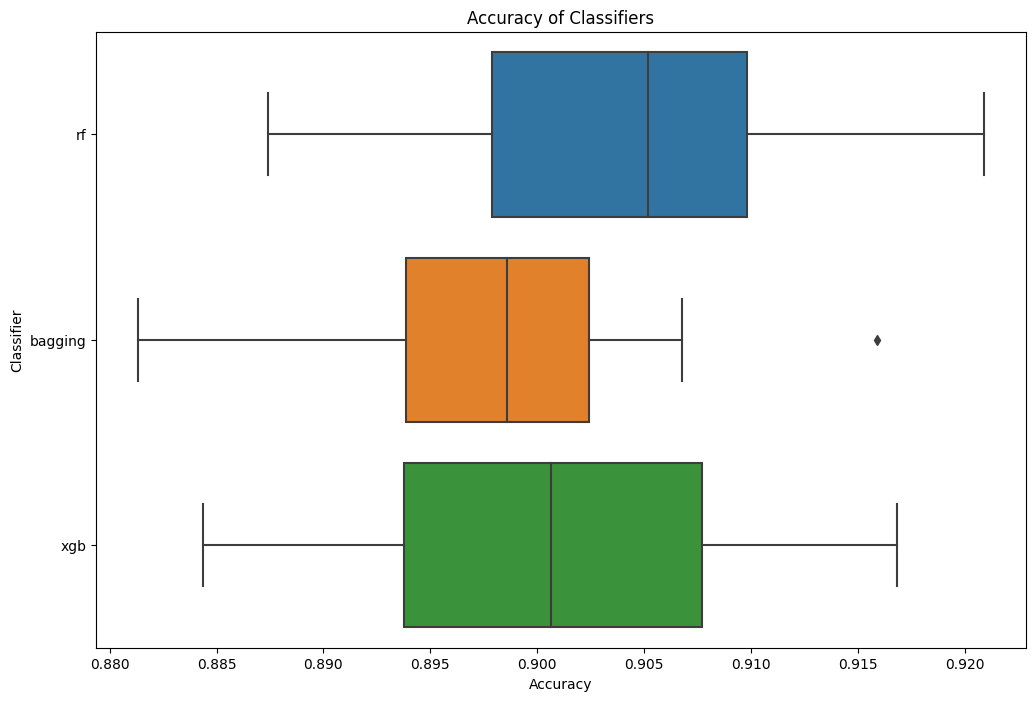

In [45]:
    # Plotting the accuracy box plot
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=pd.DataFrame(results), orient="h")
    plt.title('Accuracy of Classifiers')
    plt.xlabel('Accuracy')
    plt.ylabel('Classifier')
    plt.show()

In [47]:
import platform

In [51]:
#### DO NOT RUN THIS CELL AGAIN
my_system = platform.uname()
print(f"System: {my_system.system}")
print(f"Node Name: {my_system.node}")
print(f"Release: {my_system.release}")
print(f"Version: {my_system.version}")
print(f"Machine: {my_system.machine}")
print(f"Processor: {my_system.processor}")
print("Author of above content: Zixuan Li -- zl483")

System: Linux
Node Name: 47c8469909ca
Release: 5.15.120+
Version: #1 SMP Wed Aug 30 11:19:59 UTC 2023
Machine: x86_64
Processor: x86_64
Author of above content: Zixuan Li -- zl483


## 8 Classification with GridSearchCV (8 Points):
Replicate the classification from Q2 using GridsearchCV().

In [ ]:
# Add code here

## 9 Classification with RandomSearchCV (8 Points):
Replicate the classification from Q2 using RandomSearchCV().

In [ ]:
# Add code here

## 10 Comparison and Analysis (5 Points):
Compare the results from Q2, Q3, and Q4. Describe the best hyperparameters for all three experiments.